## Loading The Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


## Loading Dataset

In [3]:
# Load the data from the Excel file
file_path = 'data.csv'
df = pd.read_csv(file_path)

#Exploratory Data Analysis

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Check shape
df.shape

(569, 33)

In [6]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# Summary statistics for numerical columns
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
# Check for missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Data Analysis and Visualization

**Distribution of the Diagnosis**

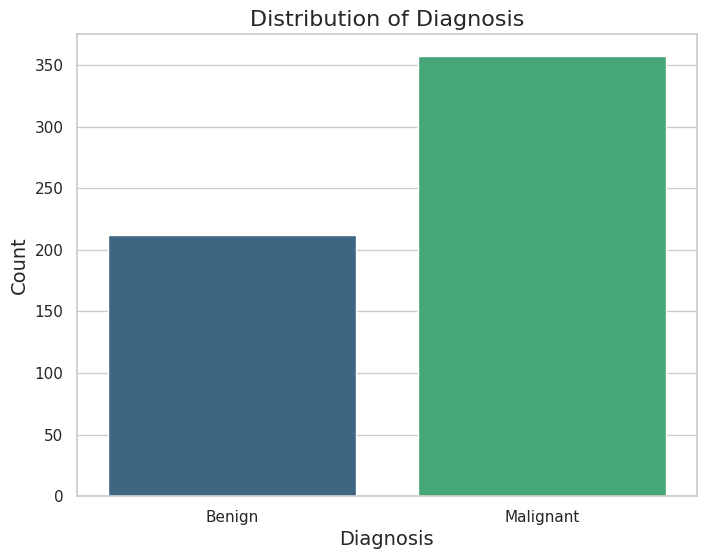

In [12]:
# Set a style
sns.set(style="whitegrid")

# Diagnosis distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.show()

**Distribution of Selected Features**

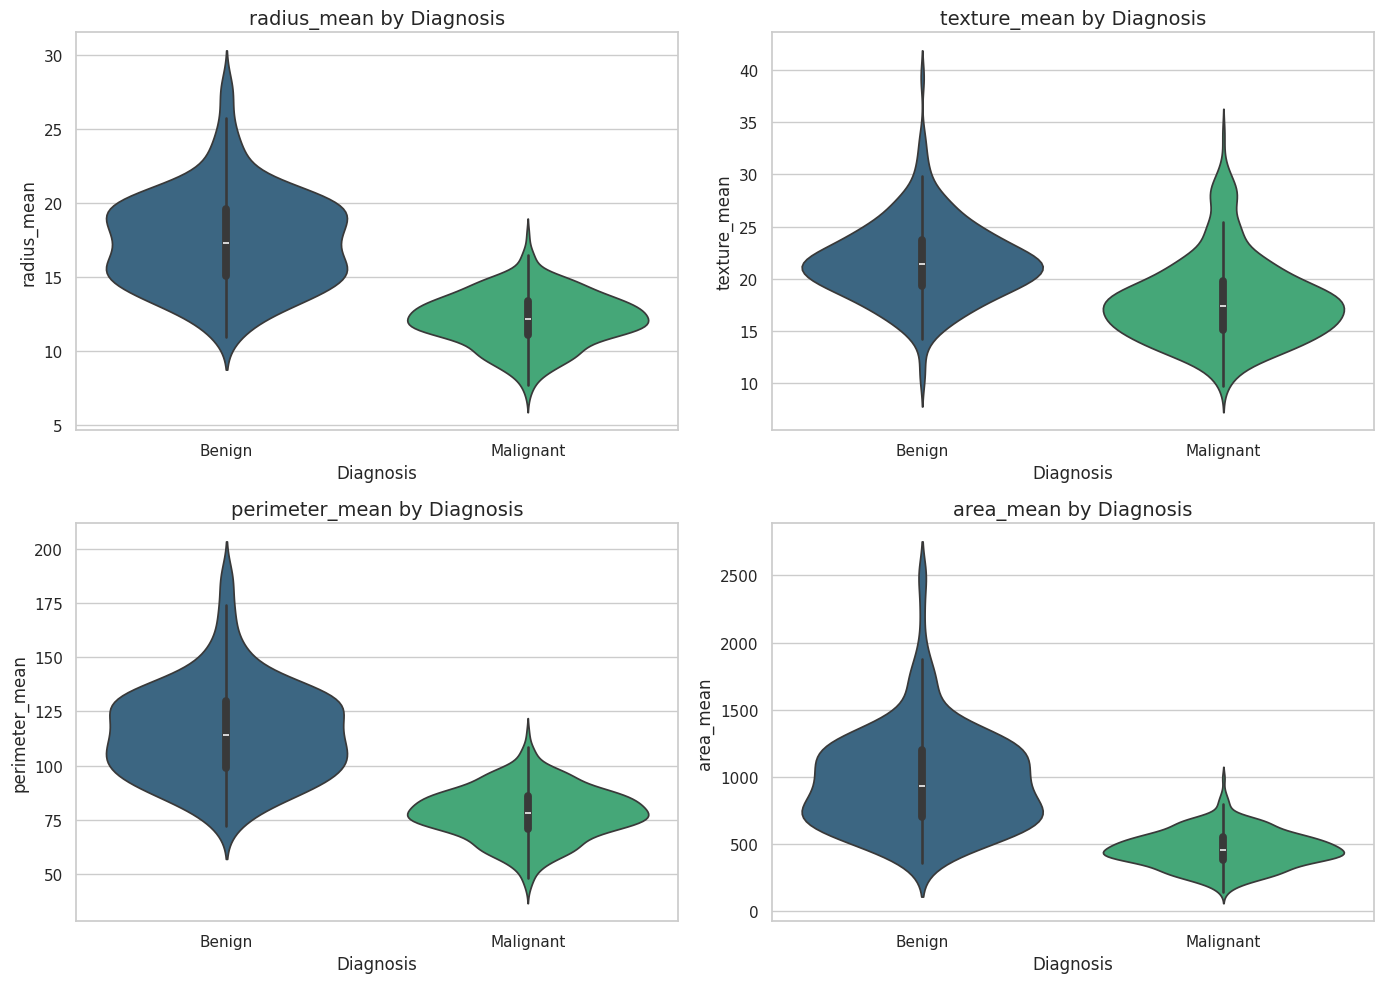

In [14]:
# Set a style
sns.set(style="whitegrid")

# Features to plot
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='diagnosis', y=feature, data=df, hue='diagnosis', palette='viridis', dodge=False, legend=False)
    plt.title(f'{feature} by Diagnosis', fontsize=14)
    plt.xlabel('Diagnosis', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])

plt.tight_layout()
plt.show()

# Boxplot to check impact

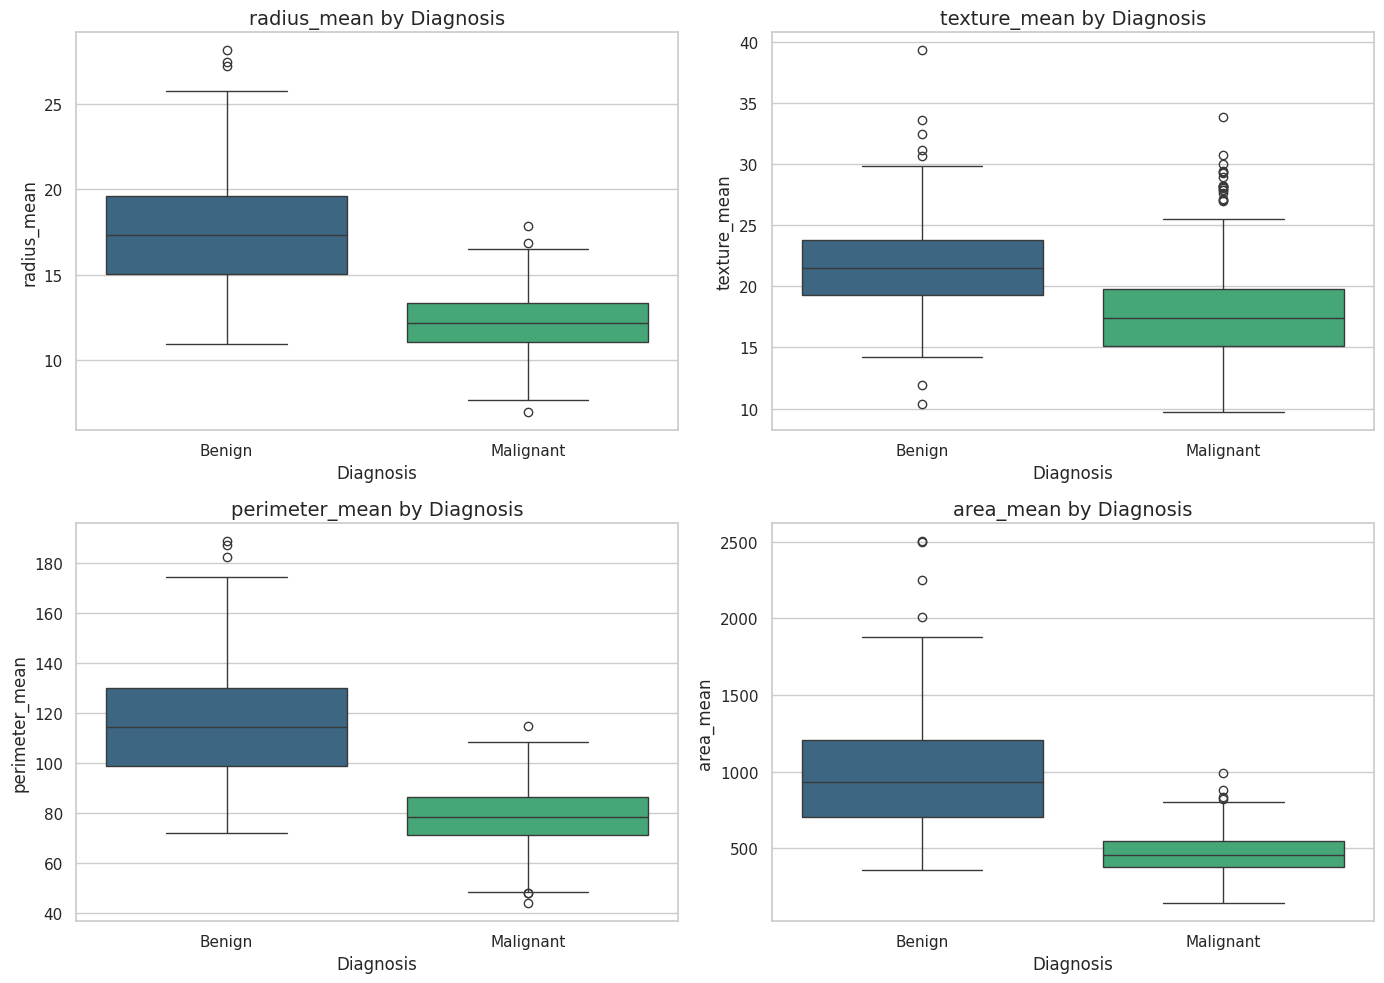

In [17]:
#Selected features for box plots
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, hue='diagnosis', palette='viridis', dodge=False)
    plt.title(f'{feature} by Diagnosis', fontsize=14)
    plt.xlabel('Diagnosis', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
    plt.legend().remove()

plt.tight_layout()
plt.show()

# Pairplot

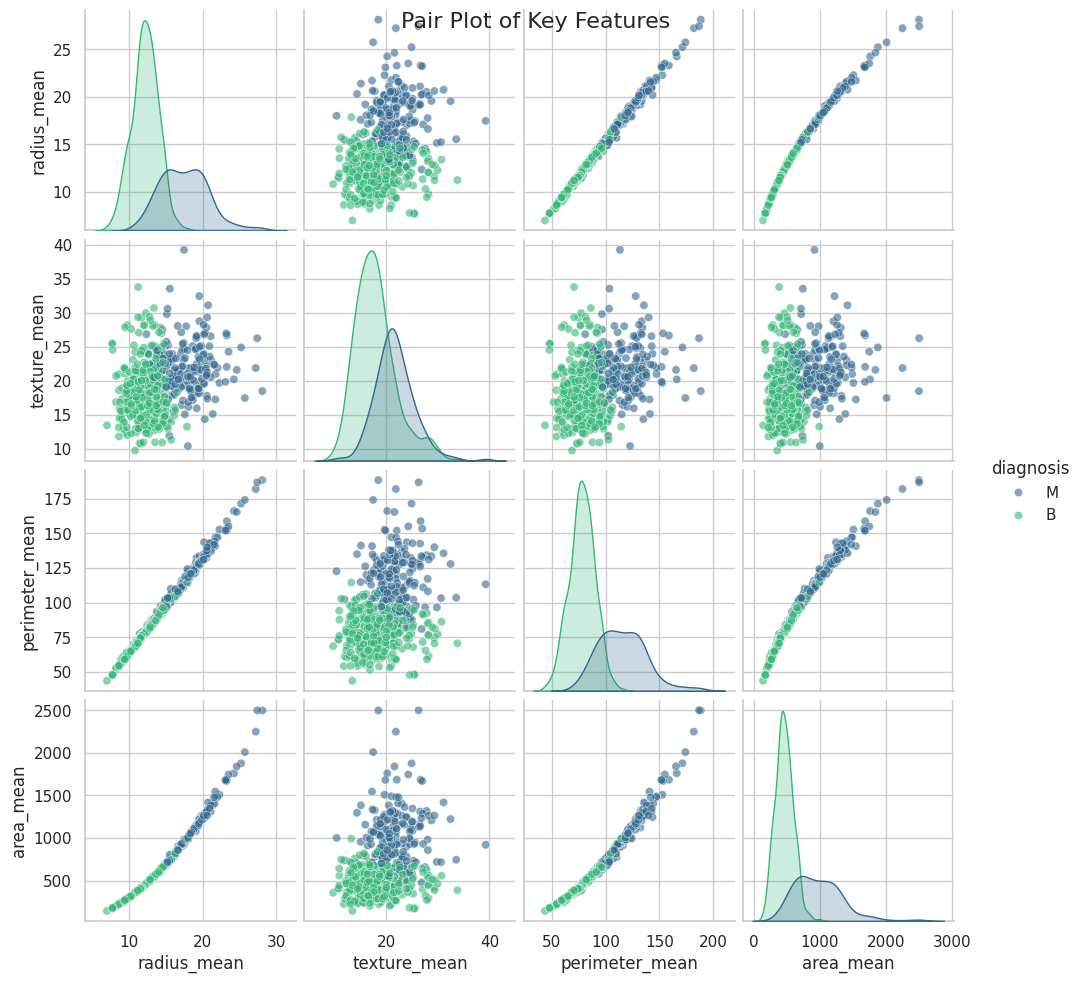

In [20]:
# Selected features for pair plot
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']

# Pair plot with diagnosis hue
sns.pairplot(df[key_features], hue='diagnosis', palette='viridis', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot of Key Features', fontsize=16)
plt.show()


# Data Preprocessing

### Missing Values

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Unnamed: 32    569
dtype: int64


In [22]:
# Drop the 'Unnamed' column
df = df.drop('Unnamed: 32', axis=1)

In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### Label Encoding

In [26]:
# Encoding the target variable 'diagnosis'
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

### Feature Importance

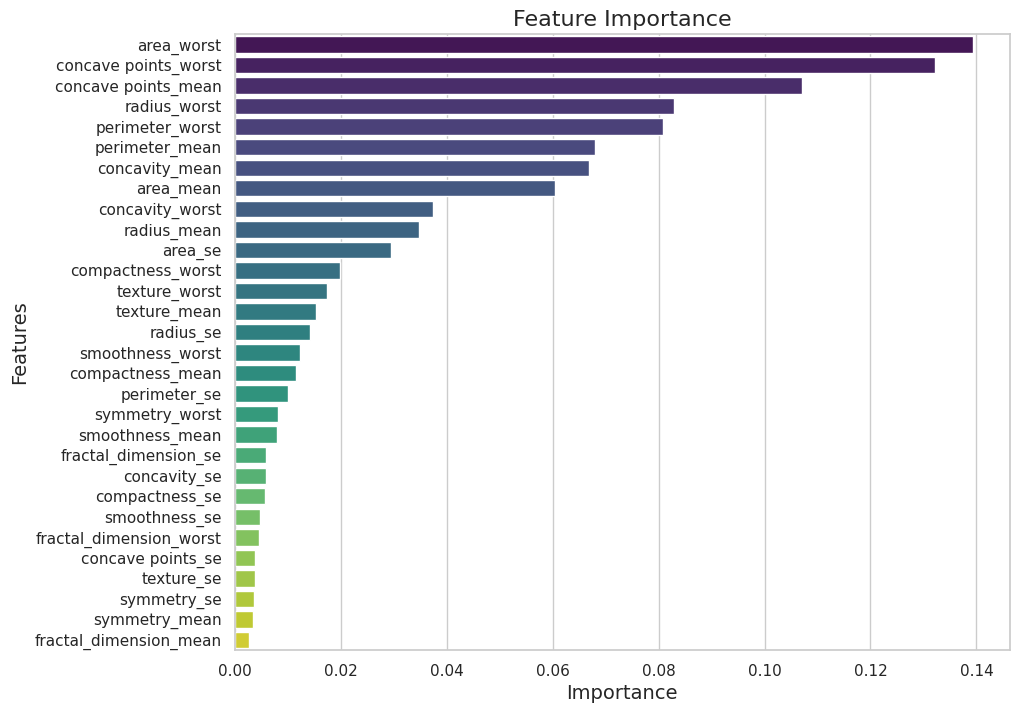

In [30]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Preparing data for Random Forest
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index, palette='viridis', dodge=False)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

### Feature Selection

In [31]:
# Select top N features (e.g., top 10 features)
N = 10
top_features = feature_importances.head(N).index
X_selected = X[top_features]

# Display selected features
print("Selected features:")
print(top_features)


Selected features:
Index(['area_worst', 'concave points_worst', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'perimeter_mean', 'concavity_mean',
       'area_mean', 'concavity_worst', 'radius_mean'],
      dtype='object')


# Data Split

In [33]:
# Use the selected features
X = df[top_features]
y = df['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')


Training set size: 455 samples
Testing set size: 114 samples


### Data Scalling

In [36]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, convert back to DataFrame for better interpretability (not necessary for modeling)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Machine Learning Models

## Logistic Regression

In [39]:
# Initialize the model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, y_train)



LogisticRegression(random_state=42)

In [42]:
# Evaluate Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_prob_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



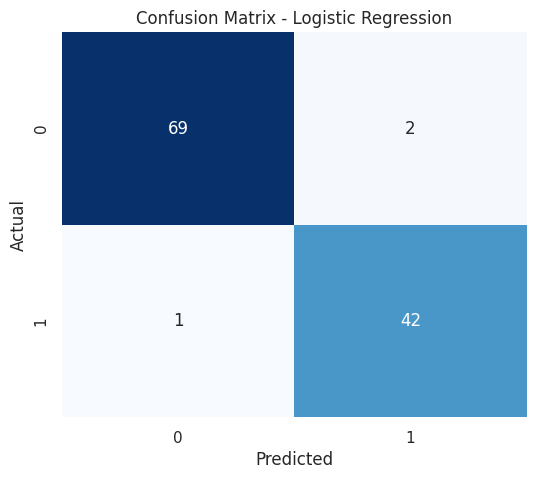

In [43]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

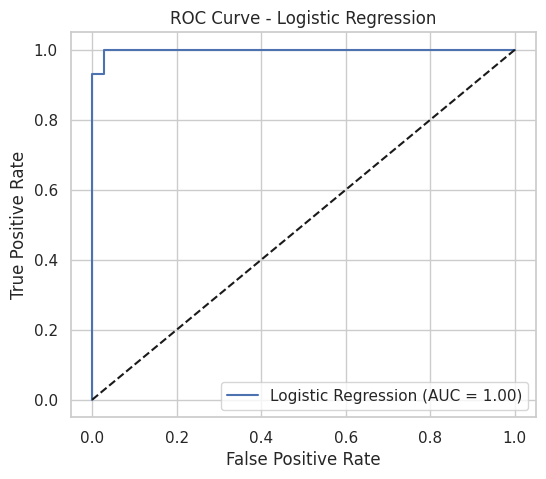

In [44]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_logistic)
roc_auc = roc_auc_score(y_test, y_prob_logistic)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

## Random Forest Classifier

In [45]:
# Initialize the model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [46]:
# Evaluate Random Forest
y_pred_rf = random_forest_model.predict(X_test_scaled)
y_prob_rf = random_forest_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Random Forest Metrics:")
print(classification_report(y_test, y_pred_rf))

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



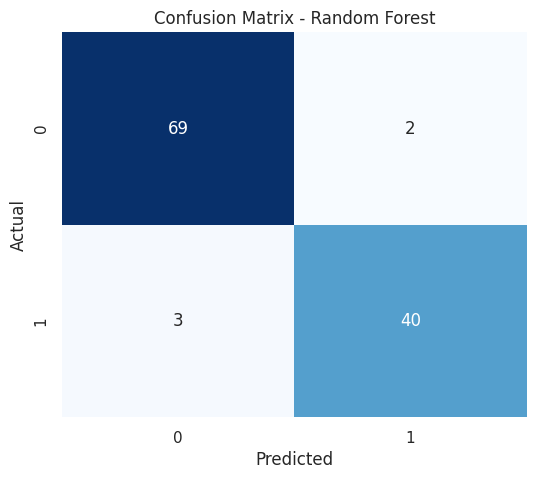

In [47]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

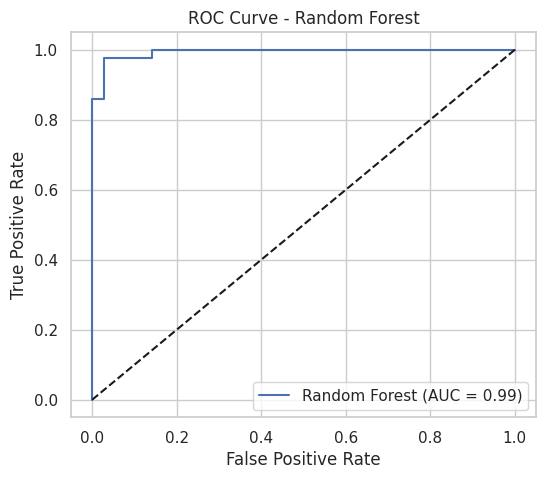

In [48]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

## SVM

In [49]:
# Initialize the model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [50]:
# Evaluate SVM
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.decision_function(X_test_scaled)

# Metrics
print("SVM Metrics:")
print(classification_report(y_test, y_pred_svm))

SVM Metrics:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



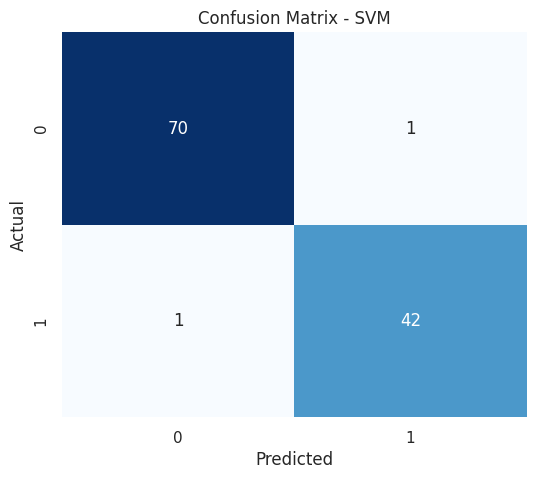

In [51]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

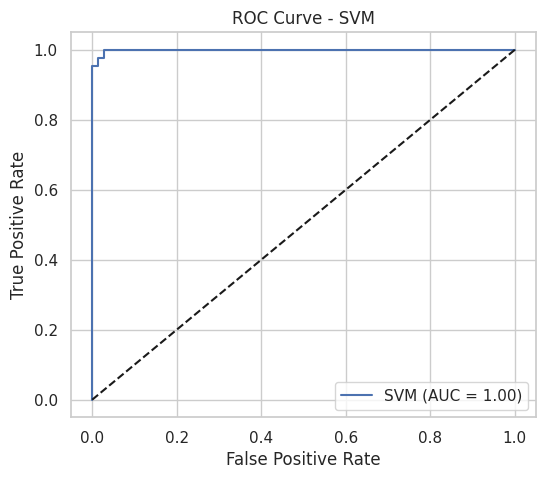

In [52]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = roc_auc_score(y_test, y_prob_svm)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()